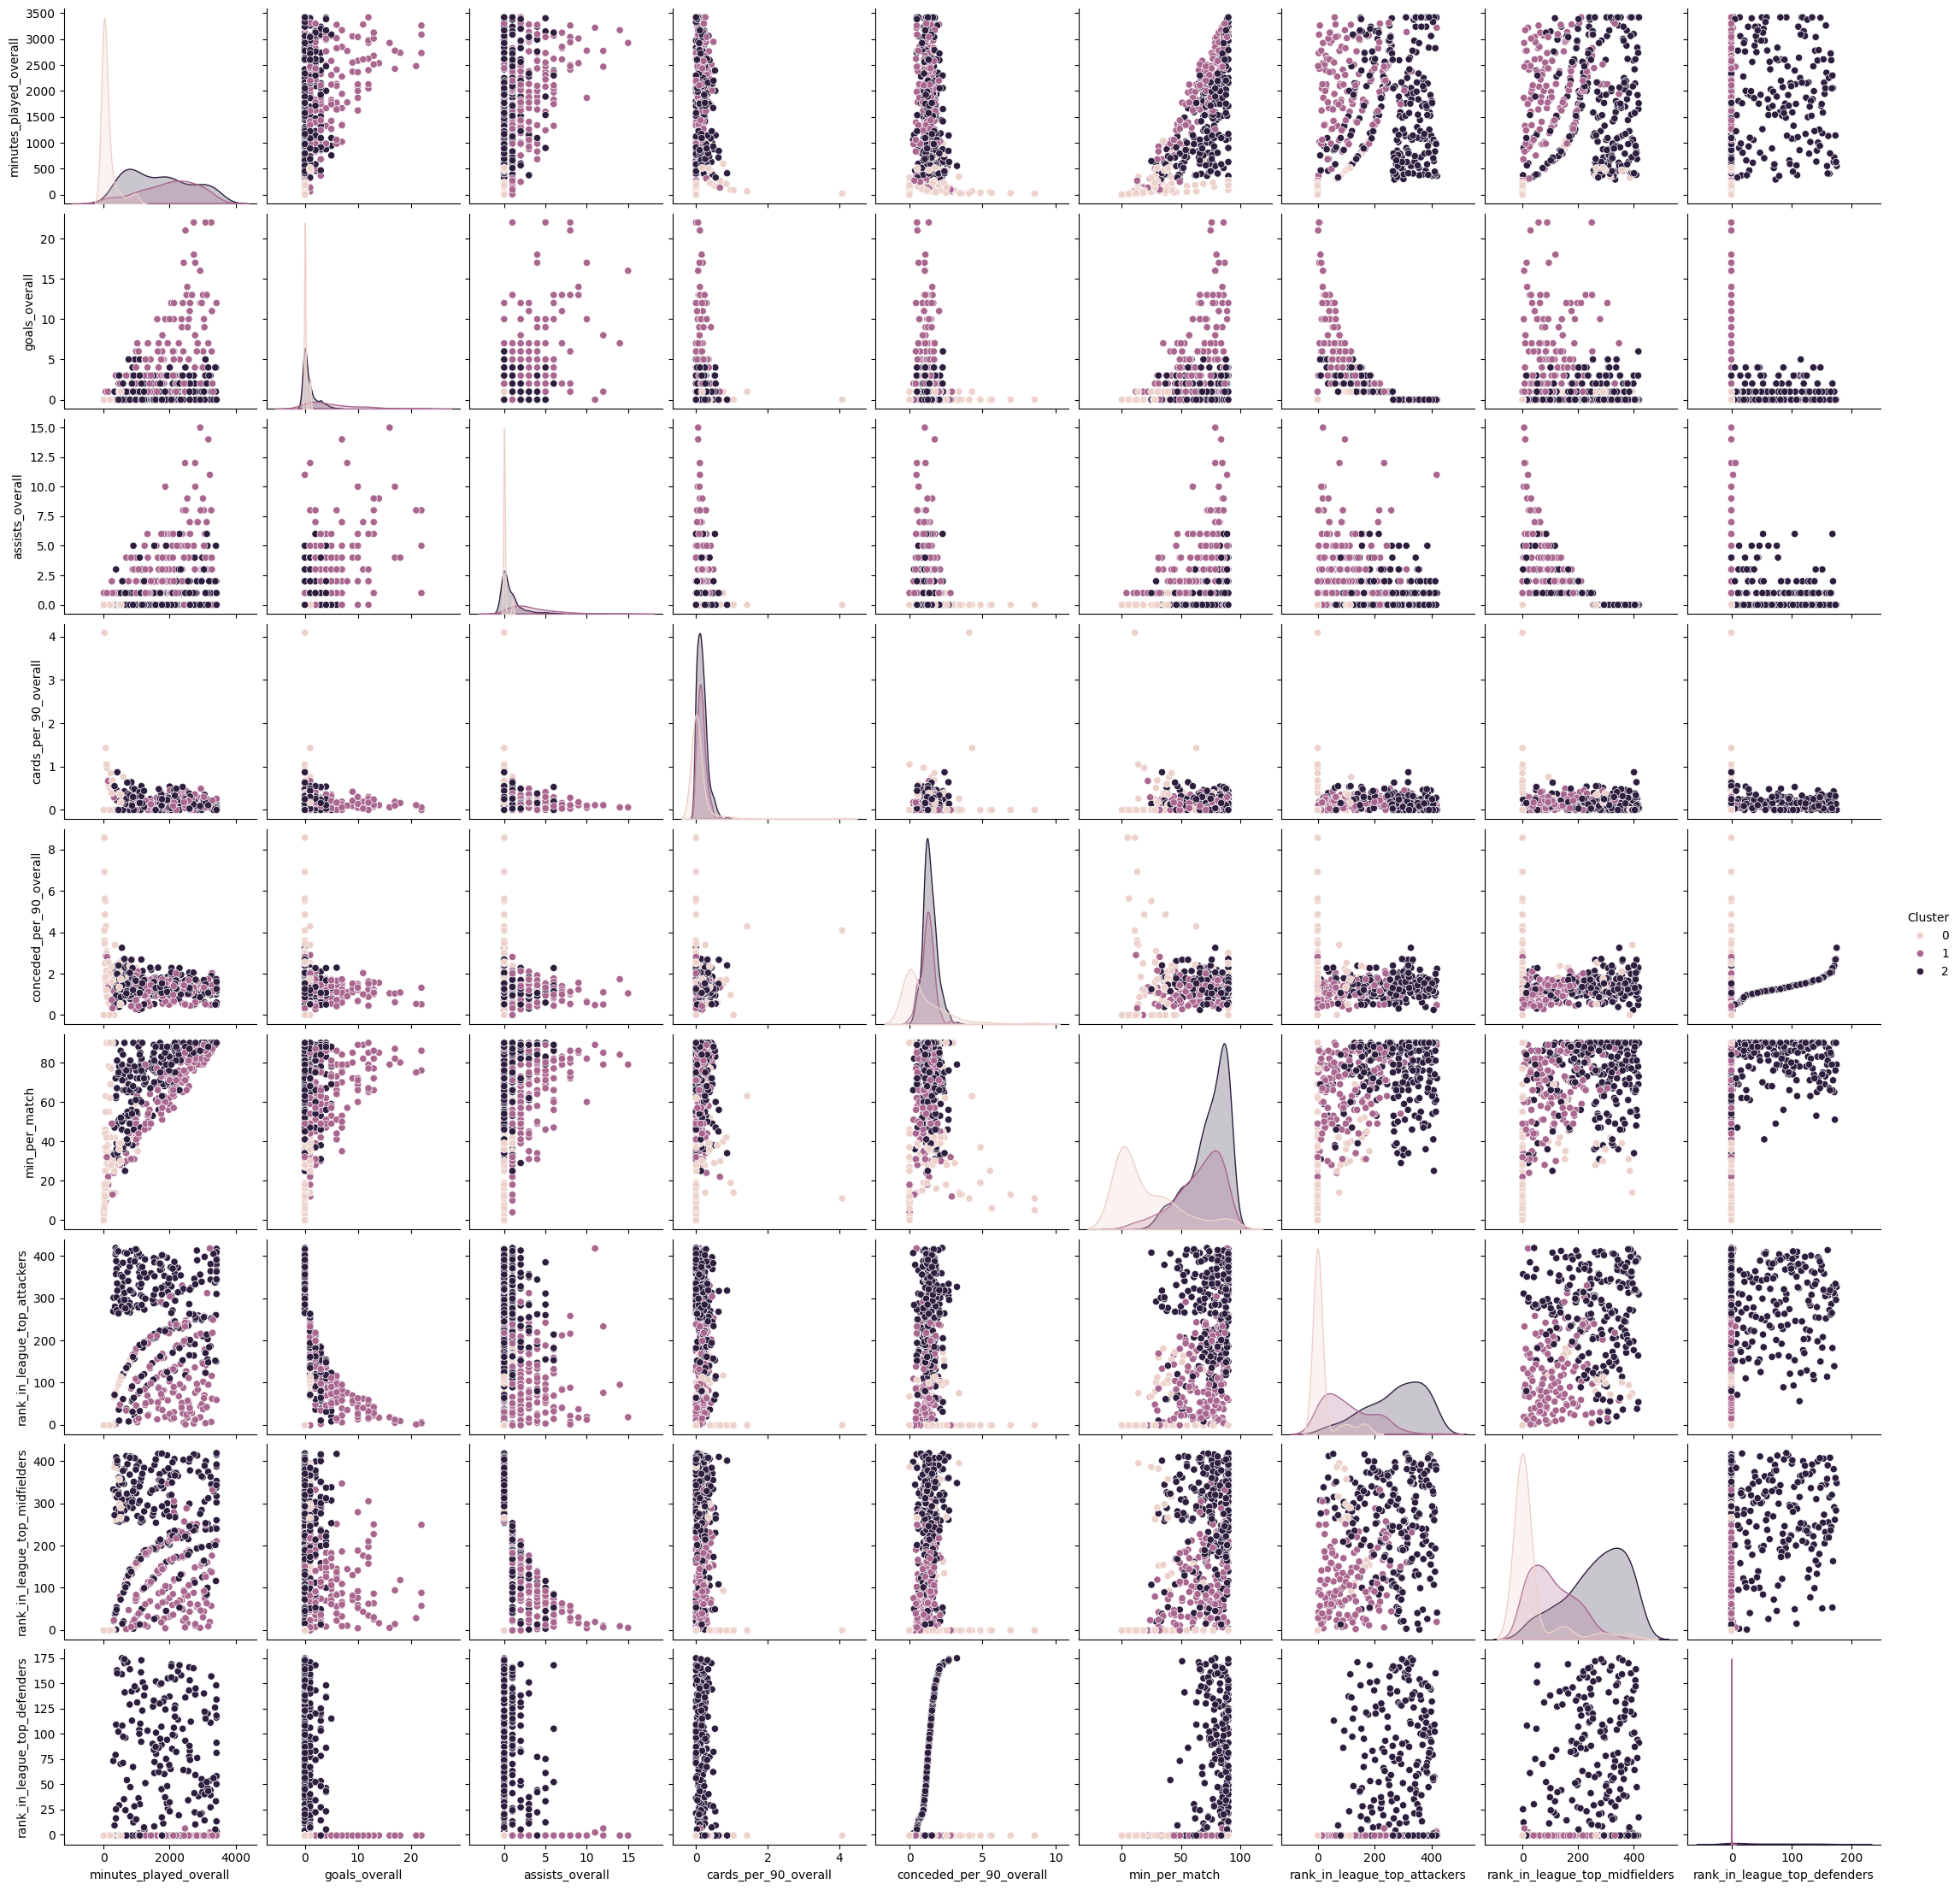

In [3]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('StastJugadores2018_2019.csv')

# Seleccionar las columnas numéricas
numerical_columns = ['minutes_played_overall', 'goals_overall', 'assists_overall',
                     'cards_per_90_overall', 'conceded_per_90_overall', 'min_per_match',
                     'rank_in_league_top_attackers', 'rank_in_league_top_midfielders',
                     'rank_in_league_top_defenders']

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

# Aplicar GMM con 3 clusters (puedes ajustar este número)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(scaled_data)

# Obtener los clusters
df['Cluster'] = gmm.predict(scaled_data)

# Visualizar los resultados
sns.pairplot(df, hue='Cluster', vars=numerical_columns)
plt.show()

# Guardar el resultado con los clusters
df.to_csv('StastJugadores2018_2019_con_clusters.csv', index=False)


In [4]:
# Contar el número de equipos en cada cluster
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)


Cluster
2    252
0    163
1    155
Name: count, dtype: int64


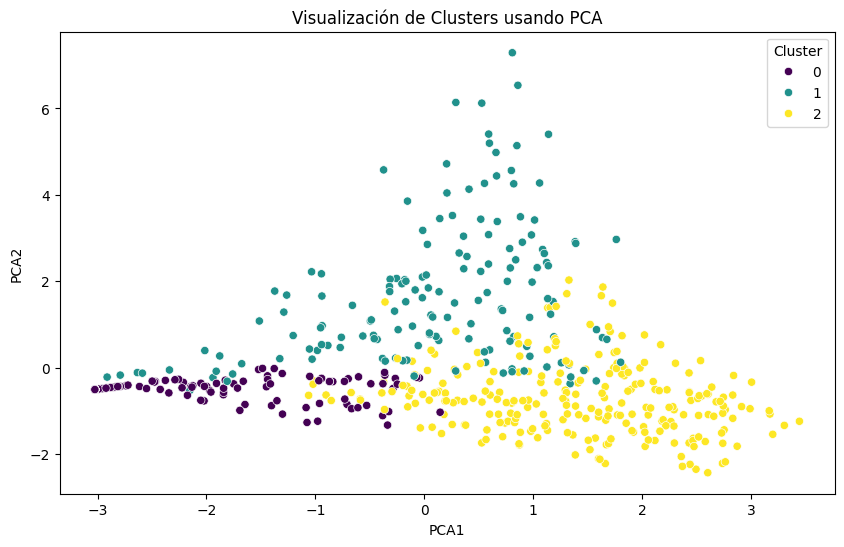

In [5]:
from sklearn.decomposition import PCA

# Reducir los datos a 2 dimensiones usando PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Añadir los resultados de PCA al dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Visualizar los clusters en 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Visualización de Clusters usando PCA')
plt.show()

In [6]:
# Calcular AIC y BIC del modelo
aic = gmm.aic(scaled_data)
bic = gmm.bic(scaled_data)

print(f"AIC: {aic}")
print(f"BIC: {bic}")

AIC: 3687.6054298799218
BIC: 4400.289793055812


In [7]:
print(df.head())


         full_name  age    position       Current Club  \
0  Aaron Cresswell   32    Defender    West Ham United   
1     Aaron Lennon   35  Midfielder            Burnley   
2       Aaron Mooy   32  Midfielder  Huddersfield Town   
3     Aaron Ramsey   31  Midfielder            Arsenal   
4       Aaron Rowe   22     Forward  Huddersfield Town   

   minutes_played_overall  goals_overall  assists_overall  \
0                    1589              0                1   
1                    1217              1                1   
2                    2327              3                1   
3                    1327              4                6   
4                      69              0                0   

   cards_per_90_overall  conceded_per_90_overall  min_per_match  \
0                  0.06                     1.25             79   
1                  0.07                     1.48             76   
2                  0.15                     1.78             80   
3               

In [8]:
df['Cluster'] = gmm.predict(scaled_data)

In [9]:
# Comprobar si la columna 'Cluster' está presente
if 'Cluster' in df.columns:
    cluster_means = df.groupby('Cluster')[numerical_columns].mean()
    print(cluster_means)
else:
    print("La columna 'Cluster' no está en el DataFrame.")

         minutes_played_overall  goals_overall  assists_overall  \
Cluster                                                           
0                    129.374233       0.141104         0.073620   
1                   1963.909677       5.212903         3.483871   
2                   1688.591270       0.829365         0.753968   

         cards_per_90_overall  conceded_per_90_overall  min_per_match  \
Cluster                                                                 
0                    0.090859                 0.956810      20.932515   
1                    0.154710                 1.198710      65.083871   
2                    0.163333                 1.381587      74.198413   

         rank_in_league_top_attackers  rank_in_league_top_midfielders  \
Cluster                                                                 
0                           16.269939                       29.300613   
1                          107.090323                      105.974194   
2     

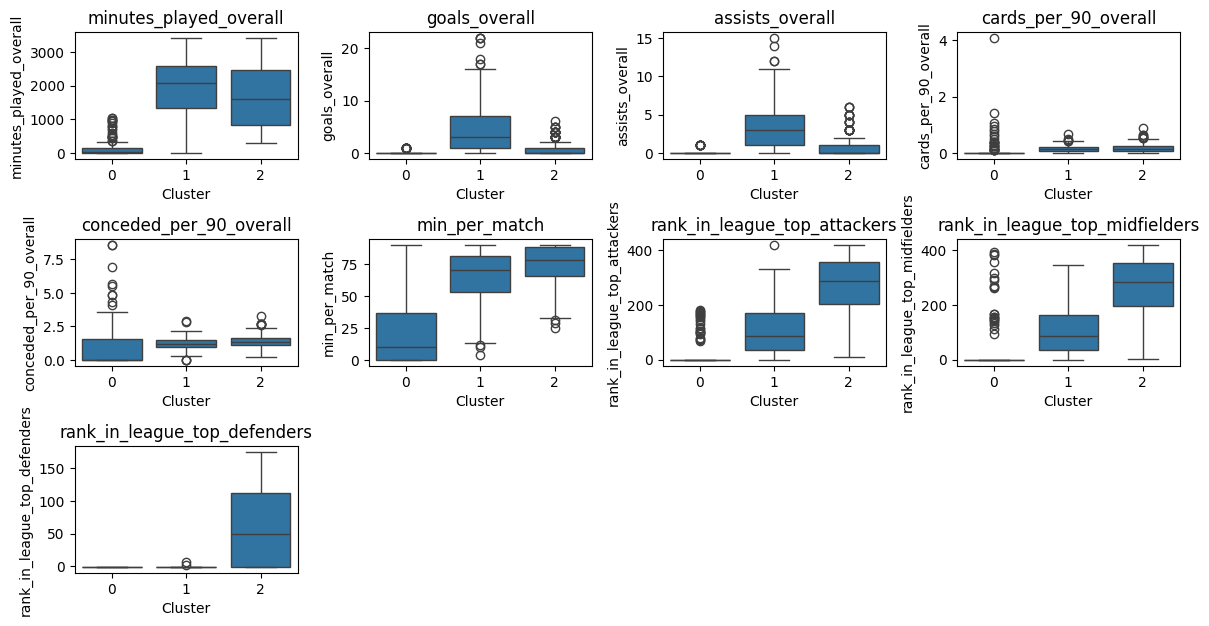

In [10]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)  # Ajusta la cantidad de subgráficos según la cantidad de columnas
    sns.boxplot(x='Cluster', y=column, data=df)
    plt.title(column)
plt.tight_layout()
plt.show()

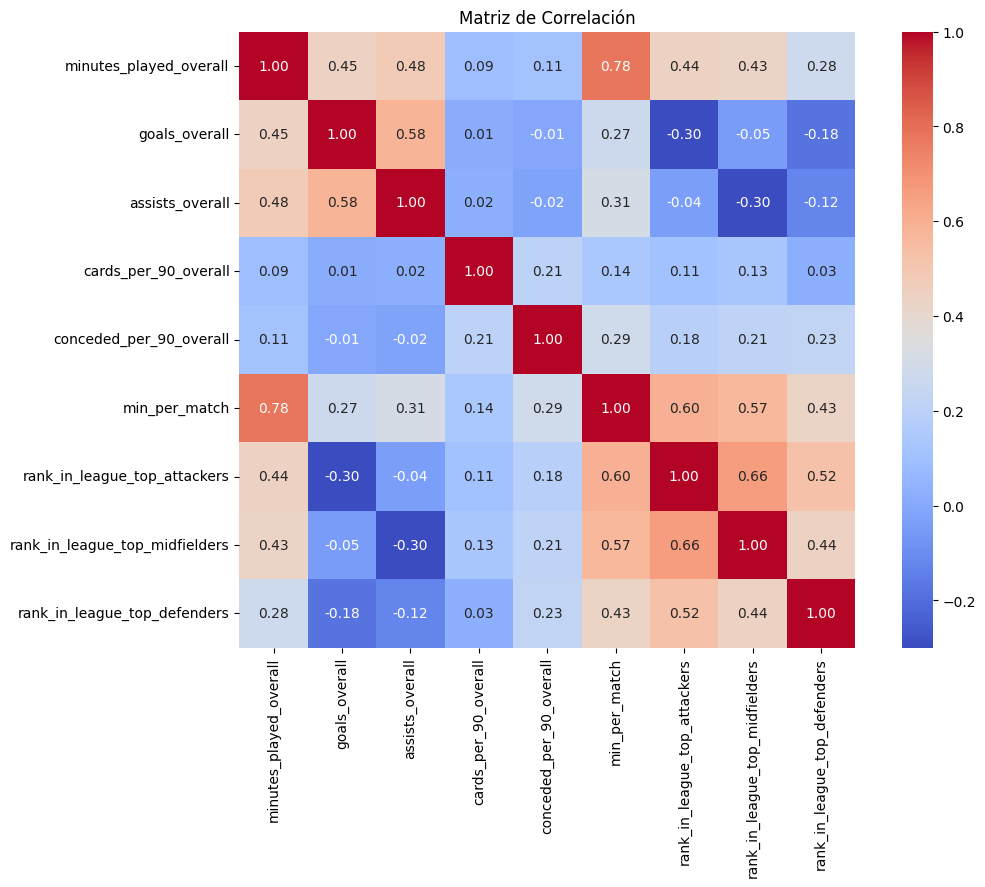

In [11]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()


In [12]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.2655631024416


In [16]:
# Jugadores a comparar
jugador1 = 'Harry Kane'
jugador2 = 'Sergio Aguero'

# Verificar si los jugadores existen en el dataframe
if not df[df['full_name'] == jugador1].empty and not df[df['full_name'] == jugador2].empty:
    # Obtener las estadísticas y el cluster de cada jugador
    stats_jugador1 = df[df['full_name'] == jugador1].iloc[0]
    stats_jugador2 = df[df['full_name'] == jugador2].iloc[0]

    # Comparar Goles
    print(f"Goles anotados: {jugador1}: {stats_jugador1['goals_overall']}, {jugador2}: {stats_jugador2['goals_overall']}")

    # Comparar Asistencias
    print(f"Asistencias: {jugador1}: {stats_jugador1['assists_overall']}, {jugador2}: {stats_jugador2['assists_overall']}")

    # Comparar Minutos Jugados
    print(f"Minutos jugados: {jugador1}: {stats_jugador1['minutes_played_overall']}, {jugador2}: {stats_jugador2['minutes_played_overall']}")

    # Comparar el % de Goles Concedidos por 90 minutos
    print(f"Concedidos por 90 minutos: {jugador1}: {stats_jugador1['conceded_per_90_overall']}, {jugador2}: {stats_jugador2['conceded_per_90_overall']}")

    # Comparar el Cluster
    print(f"Cluster: {jugador1}: {stats_jugador1['Cluster']}, {jugador2}: {stats_jugador2['Cluster']}")
else:
    if df[df['full_name'] == jugador1].empty:
        print(f"El jugador {jugador1} no se encuentra en el dataset.")
    if df[df['full_name'] == jugador2].empty:
        print(f"El jugador {jugador2} no se encuentra en el dataset.")


Goles anotados: Harry Kane: 17, Sergio Aguero: 21
Asistencias: Harry Kane: 4, Sergio Aguero: 8
Minutos jugados: Harry Kane: 2427, Sergio Aguero: 2480
Concedidos por 90 minutos: Harry Kane: 1.04, Sergio Aguero: 0.54
Cluster: Harry Kane: 1, Sergio Aguero: 1


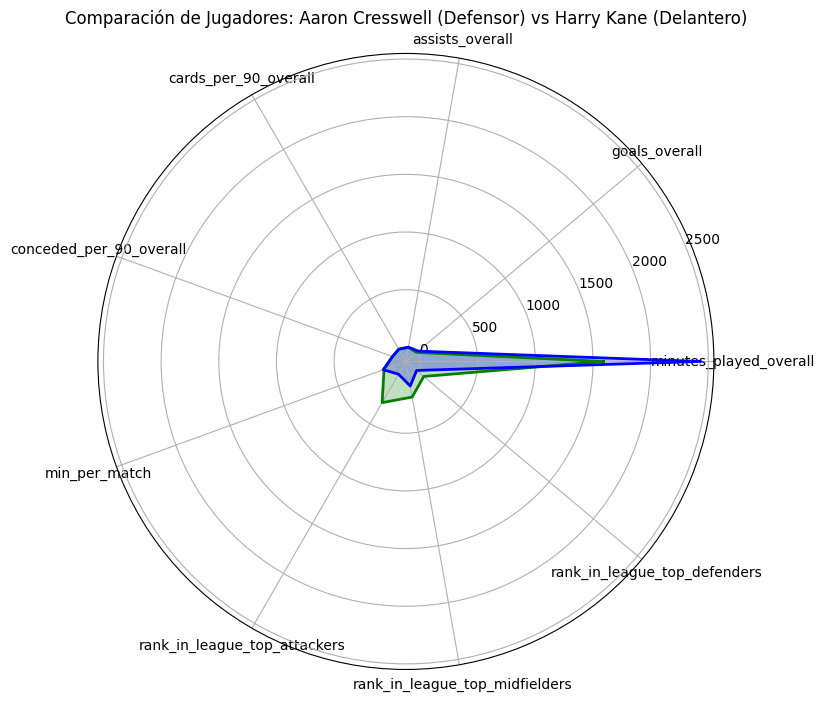

In [26]:
import matplotlib.pyplot as plt
from math import pi

# Función para dibujar el gráfico de radar (o araña)
def radar_chart(data, labels, color):
    num_vars = len(labels)

    # Calcula el ángulo para cada eje
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    data = data.tolist()
    data += data[:1]
    angles += angles[:1]

    # Dibuja el gráfico
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], labels)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, data, color=color, alpha=0.25)

# Columnas numéricas a comparar
numerical_columns = ['minutes_played_overall', 'goals_overall', 'assists_overall',
                     'cards_per_90_overall', 'conceded_per_90_overall', 'min_per_match',
                     'rank_in_league_top_attackers', 'rank_in_league_top_midfielders',
                     'rank_in_league_top_defenders']

# Seleccionar un defensor y un delantero para comparar
jugador_defensor_data = df[df['full_name'] == 'Aaron Cresswell'][numerical_columns].dropna().mean()
jugador_delantero_data = df[df['full_name'] == 'Harry Kane'][numerical_columns].dropna().mean()

# Asegurarse de que las columnas existan en ambos jugadores
valid_columns = jugador_defensor_data.index.intersection(jugador_delantero_data.index)

jugador_defensor_data = jugador_defensor_data[valid_columns]
jugador_delantero_data = jugador_delantero_data[valid_columns]

# Gráfico de radar con todas las columnas incluidas (defensor vs delantero)
plt.figure(figsize=(8, 8))
radar_chart(jugador_defensor_data, valid_columns, color='green')  # Defensor
radar_chart(jugador_delantero_data, valid_columns, color='blue')  # Delantero
plt.title('Comparación de Jugadores: Aaron Cresswell (Defensor) vs Harry Kane (Delantero)')
plt.show()